In [221]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt

%matplotlib inline 

In [222]:
# parameters
e = 1
E = 1 # for test 
h_bar = 1 # 6.582E16 #1.055E-34 # J*s per one a.u.
m = 1 # 9.1E-31
k_in = np.sqrt(2*m*E)/h_bar # a.u
k_out = k_in # elastic scattering

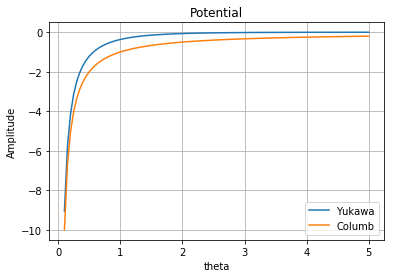

In [223]:
#Yukawa potential 
V0 = 1
mu = 1

V_Yuk = lambda x: -V0*np.exp(-x/mu)/x/mu
r_ = np.linspace(0.1,5,100)

plt.plot(r_,V_Yuk(r_),r_,-1/r_)
plt.title("Potential")
plt.ylabel('Amplitude')
plt.xlabel('theta')
plt.legend(["Yukawa","Columb"])
plt.grid()
plt.show()

In [224]:
#http://farside.ph.utexas.edu/teaching/qmech/Quantum/node133.html
def non_integral_scat_amp(x, q): # ?
    V = V_Yuk(x)
    I = x*V*np.sin(q*x)
    I = - (2*m/np.pi/q/h_bar**2) * I
    return I

In [225]:
# Scattering amplitude calculation
"""
If a detector is at distance 0.3 m and its size 0.5 m then 
the max_scat_angle is approximately pi/3,
but we consider the infinite square detector
"""

#theta = np.linspace(-np.pi, np.pi,100)

#screen coordinate
y_screen = np.linspace(-10, 10, 500)
x_screen = np.linspace(-10, 10, 500)

#r_screen = np.sqrt(np.power(x_screen,2) + np.power(y_screen,2))
d_screen_norm = 0.5 # distantce to screen

#theta = np.arctan2(r_screen, d_screen)

d_screen = np.sqrt(np.power(x_screen,2) + np.power(d_screen_norm,2))
theta = np.arctan2(y_screen, d_screen)
    
#print(theta)
def scat_amp(theta):
    #print(1)
    scat_amp = []
    Q = 2*k_in*np.sin(theta/2)
    for q in Q:
        I,_ = integrate.quad(non_integral_scat_amp, 0.001, np.inf, args = (q))
        scat_amp.append(I)
    #scat_amp = np.reshape(scat_amp,( np.sqrt(n),np.sqrt(n) ))
    return scat_amp

#vec_scat_amp = np.vectorize(scat_amp) # vectorization for meshgrid?

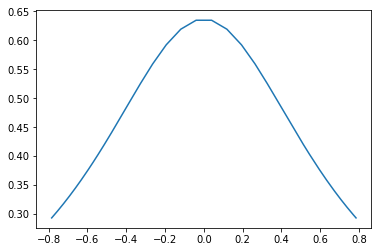

In [226]:
plt.plot(theta,scat_amp(theta)) # why are limits so small?

Text(0.5,0,'$\\theta$, rad')

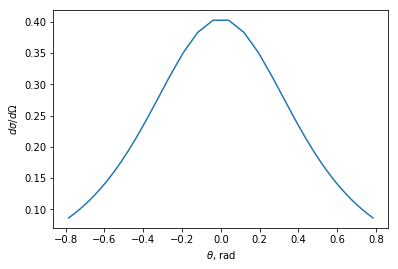

In [227]:
def cross_sec(theta) : return np.power(
    np.abs(scat_amp(theta)),2)

#vec_cross_sec = np.vectorize(cross_sec) # vectorization for meshgrid?
plt.plot(theta,cross_sec(theta))
plt.ylabel(r"$d \sigma / d \Omega$")
plt.xlabel(r'$\theta$, rad')

In [228]:
x = np.array([1,2,3])
y = np.broadcast_to(x,[len(x),len(x)],3)
print(y)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [ ]:
#https://matplotlib.org/examples/mplot3d/surface3d_radial_demo.html
# Check
# 3D surface with polar coordinate
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# mesh in polar coordinate
# we already have the theta
phi = np.linspace(0, 2*np.pi, 100)
theta = np.linspace(0, np.pi/2, 100)

X_SCREEN, Y_SCREEN = np.meshgrid(x_screen, y_screen)

D_SCREEN = np.sqrt(np.power(X_SCREEN,2) + np.power(d_screen_norm,2))
THETA = np.arctan2(Y_SCREEN, D_SCREEN)

CROSS_SCAT,_ = np.meshgrid(cross_sec(theta), theta)
ax.plot_surface(X_SCREEN, Y_SCREEN, CROSS_SCAT, cmap=plt.cm.YlGnBu_r)
#print(THETA[0,:])
#DIFF_PAT = np.broadcast_to(cross_sec(theta),len(THETA[:,1])) 

#d_screen = np.sqrt(np.power(x_screen,2) + np.power(d_screen_norm,2))
#theta = np.arctan2(y_screen, d_screen)

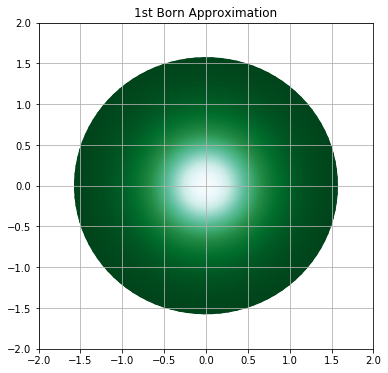

In [280]:
fig, ax = plt.subplots(figsize=(6, 6))
#ax = fig.add_subplot(111, projection = '3d')
#fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(21, 5))
phi = np.linspace(0.0, 2*np.pi, 100)
theta = np.linspace(0.01, np.pi/2, 100)


THETA, PHI = np.meshgrid(theta, phi)
CROSS_SCAT,_ = np.meshgrid(cross_sec(theta), theta)
#CROSS_SCAT  = np.broadcast_to(cross_sec(theta),THETA.shape) 

#PHI, THETA = np.meshgrid(phi, theta)0
#plt.plot(theta, cross_sec(theta))

X_SCREEN = THETA*np.cos(PHI)
Y_SCREEN = THETA*np.sin(PHI)

#print(CROSS_SCAT.shape, THETA.shape[1])

#ax.plot_surface(X_SCREEN, Y_SCREEN, CROSS_SCAT, cmap=plt.cm.YlGnBu_r)
ax.pcolormesh(X_SCREEN, Y_SCREEN, CROSS_SCAT, shading='gouraud', cmap=plt.cm.BuGn_r)
#ax.view_init(90, 180)
#ax.contourf(X_SCREEN, Y_SCREEN, CROSS_SCAT, 10000)
#for angle in range(0, 360):
    #ax.view_init(30, angle)
    #plt.draw()
    #plt.pause(.001)
#ax.plot_surface(PHI, THETA, CROSS_SCAT, cmap=plt.cm.YlGnBu_r)
#ax.contour(X_SCREEN, Y_SCREEN, CROSS_SCAT)

ax.set_title('1st Born Approximation')

ax = plt.gca()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid()

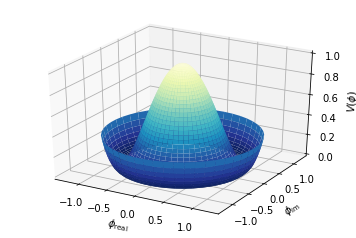

In [247]:
#TEST PLOT
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

#print(Z)

plt.show()

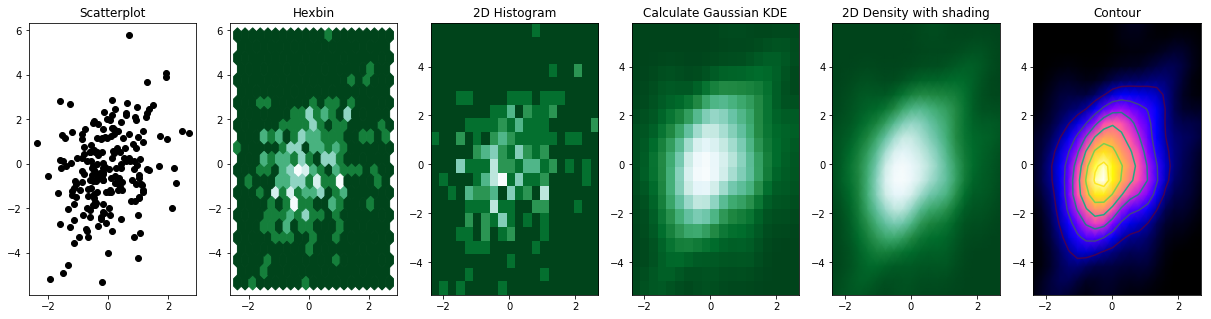

In [274]:
#TEST PLOT
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.gnuplot2)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )